 <h1 style="text-align: center; color: RED">MÜŞTERİ YAŞAM BOYU DEĞERİ TAHMİNİ</h1>

Bu kısımda zaman projeksiyonlu olasılıksal lifetime value tahmini gerçekleştiricez.İşlemlerimiz **satın alma başına ortalama kazanç * satın alma sayısı** formülü üzerinden gerçekleştirilecektir.

CLTV = (Customer Value / Churn Rate) * Profit Margin

Customer Value = Average Order Value * Purchase Frequency

Öyle birşey yapmamız lazım ki tüm kitlenin satın alma davranışlarını ve bütün kitlenin işlem başına ortalama bırakacağı kazancı olasılıksal olarak modelleyebilelim ve bu olasılıksal modelin üzerine bir kişinin özelliklerini girerek genel kitle davranışlarından beslenerek bir tahmin işleminde bulanabilelim.

CLTV = Expected Number of Transaction * Expected Average Profit

CLTV = BG/NBD Model*Gamma Gamma Submodel

 <h2 style="text-align: center; color: RED">BG/NBD(BETA GEOMETRIC / NEGATIVE BİNOMAL DISTRIBUTION İLE EXPECTED NUMBER OF TRANSACTION)</h2>

Expected : Bir rassal değişkenin beklenen değerini ifade etmek için kullanılır.
Rassal Değişken : Değerlerini bir deneyin sonuçlarından alan değişkene denir. Bir rassal değişken demek bir değişkenin belirli bir olasılık dağılımı izlediğini varsaydığımızda aslında o olasılık dağılımı izlediğini varsaydığımız değişkenin ortalaması demektir. Genel olarak kitleden bir dağılım öğrenecez ki bu dağılım yapısı insanların satın alma, transaction davranışlarının dağılımı olacak.Bu bir olasılık dağılımıdır. Bu olasılık dağılımının beklenen bir değeri vardır yani beklenen bir ortalama değeri vardır.Bu olasılık dağılımının beklenen değerini koşullandırarak yani bireyler özelinde biçimlendirerek her bir birey için beklenen işlem sayısını tahmin etmiş olacaz.

Amacımız olasılık dağılımı aracıyla genel kitlenin satın alma davranışlarını modelleyip bunları kişilerin özeline indirgemektir. Satın alma frekanslarını bg/nbd modeli ile ortlama siparişleri gamma gamma modeli ile yapacaz.

BG/NBD modelinin diğer adı "buy till you die" yani ölene kadar satın al.

BG/NBD modeli, expected number of transaction için iki süreci olasılıksal olarak modeller.
* Transaction Process(Buy):Satın alma süreci
* Dropout Process(till you die):inaktif olma, markayı bırakma süreci


<span style="color: blue; font-weight: bold;">Transaction Process(Buy)</span> 

* Alive olduğu sürece, belirli bir zaman periyodunda, bir müşteri tarafından gerçekleştirilecek işlem sayısı transaction rate parametresi ile possion dağılır.
* Bir müşteri alive olduğu sürece kendi transaction rate'i etrafında rastgele satın alma yapmaya devam edecektir.
* Transaction rate'ler her bir müşteriye göre değişir ve tüm kitle için gamma dağılır.(r,a)
* Her bir müşteriye göre satın alma alışkanlığı değişir.

<span style="color: blue; font-weight: bold;">Dropout Process(till you die)</span>

* Her bir müşterinin p olasılığı ile dropout rate(dropout probability)'i vardır.
* Bir müşteri alışveriş yaptıktan sonra belirli bir olasılıkla drop olur.
* Drop rate'ler her bir müşteriye göre değişir ve tüm kitle için beta dağılır.(a,b)

 <h2 style="text-align: center; color: RED">GAMMA GAMMA ALT MODEL</h2>

Bir müşterinin işlem başına ortalama ne kadar kar getirebileceğini tahmin etmek için kullanılır.

* Bir müşterinin işlemsel parasal değeri(monratary) transaction value'larının ortalaması etrafında rastgele dağılır.
* Ortalama transaction value, zaman içinde kullanıcılar arasında değişebilir fakat tek bir kullanıcı için değişmez.
* Ortalama transaction value tüm müşteriler arasında gamma dağılır.


 <h2 style="text-align: center; color: RED">BG-NBD ve Gamma Gamma ile CLTV Tahmini </h2>

1. Verinin Hazırlanması (Data Preperation)
2. BG-NBD Modeli ile Expected Number of Transaction
3. Gamma-Gamma Modeli ile Expected Average Profit
4. BG-NBD ve Gamma-Gamma Modeli ile CLTV'nin Hesaplanması
5. CLTV'ye Göre Segmentlerin Oluşturulması
6. Çalışmanın fonksiyonlaştırılması

<span style="color: blue; font-weight: bold;">1. Verinin Hazırlanması (Data Preperation)</span>

Bir e-ticaret şirketi müşterilerini segmentlere ayırıp bu segmentlere göre
pazarlama stratejileri belirlemek istiyor.

**Veri Seti Hikayesi**

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

Online Retail II isimli veri seti İngiltere merkezli online bir satış mağazasının
01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içeriyor.

**Değişkenler**

InvoiceNo: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. C ile başlıyorsa iptal edilen işlem.

StockCode: Ürün kodu. Her bir ürün için eşsiz numara.

Description: Ürün ismi

Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.

InvoiceDate: Fatura tarihi ve zamanı.

UnitPrice: Ürün fiyatı (Sterlin cinsinden)

CustomerID: Eşsiz müşteri numarası

Country: Ülke ismi. Müşterinin yaşadığı ülke.

In [31]:
# Gerekli Kütüphane ve Fonksiyonlar
!pip install lifetimes

In [7]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

* Kuracak olduğumuz modeller olasılıksal modeller olduğundan dolayı bu modelleri kurarken kullanacağımız değişkenlerin dağılımları sonuçları etkileyebilecektir. Bundan dolayı elimizdeki değişkenleri oluşturduktan sonra bu değişkenlerdeki aykırı değerleri tespit edip baskılamamız gerekmektedir.IQR yöntemi kullanraka bu problemi çözecez. Aykırı değer, bir değişkenin genel dağılımının oldukça dışında olan değerlerdir.

In [8]:
def outlier_thresholds(dataframe, variable, q1=0.01, q3=0.99):
    quartile1 = dataframe[variable].quantile(q1)
    quartile3 = dataframe[variable].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + IQR*1.5
    low_limit = quartile1 - IQR*1.5
    return low_limit, up_limit

In [11]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.01, q3=0.99)
    dataframe.loc[dataframe[variable]>up_limit, variable] = up_limit
    dataframe.loc[dataframe[variable]<low_limit, variable] = low_limit

In [13]:
#Verinin Okunması
df_ = pd.read_excel("C:\\Users\\ASLI\\Desktop\\Data Scientist Bootcamp\\3.CRM Analytics\\resim\\online_retail_II.xlsx", 
                    sheet_name='Year 2010-2011')

In [14]:
df = df_.copy()

In [13]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5500,17850.0000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.7500,17850.0000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom


In [49]:
df.shape

(541910, 8)

In [51]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [55]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541910.0000,9.5522,-80995.0000,1.0000,3.0000,10.0000,80995.0000,218.0810
InvoiceDate,541910,2011-07-04 13:35:22.342307584,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
Price,541910.0000,4.6111,-11062.0600,1.2500,2.0800,4.1300,38970.0000,96.7598
Customer ID,406830.0000,15287.6842,12346.0000,13953.0000,15152.0000,16791.0000,18287.0000,1713.6031


In [15]:
#VERİ ÖN İŞLEME
df.dropna(inplace=True) #eksik değerleri sildim

In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,406830.0000,12.0613,-80995.0000,2.0000,5.0000,12.0000,80995.0000,248.6931
InvoiceDate,406830,2011-07-10 16:31:30.127424512,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-12-09 12:50:00,NaN
Price,406830.0000,3.4605,0.0000,1.2500,1.9500,3.7500,38970.0000,69.3151
Customer ID,406830.0000,15287.6842,12346.0000,13953.0000,15152.0000,16791.0000,18287.0000,1713.6031


In [19]:
df = df[~df['Invoice'].str.contains('C', na=False)]#iade olan işlmeleri veri setinden cıkardık

In [64]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,397925.0000,13.0218,1.0000,2.0000,6.0000,12.0000,80995.0000,180.4200
InvoiceDate,397925,2011-07-10 23:44:09.817126400,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:33:00,2011-12-09 12:50:00,NaN
Price,397925.0000,3.1162,0.0000,1.2500,1.9500,3.7500,8142.7500,22.0968
Customer ID,397925.0000,15294.3086,12346.0000,13969.0000,15159.0000,16795.0000,18287.0000,1713.1727


In [21]:
df = df[df['Quantity'] > 0]

In [23]:
df = df[df['Price'] > 0]

In [74]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,397885.0000,12.9882,1.0000,2.0000,6.0000,12.0000,80995.0000,179.3316
InvoiceDate,397885,2011-07-10 23:41:56.419316992,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:33:00,2011-12-09 12:50:00,NaN
Price,397885.0000,3.1165,0.0010,1.2500,1.9500,3.7500,8142.7500,22.0979
Customer ID,397885.0000,15294.4169,12346.0000,13969.0000,15159.0000,16795.0000,18287.0000,1713.1444


In [25]:
replace_with_thresholds(df, 'Quantity') #aykırı değerleri baskıladık
replace_with_thresholds(df, 'Price')

In [78]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,397885.0000,11.8308,1.0000,2.0000,6.0000,12.0000,298.5000,25.5231
InvoiceDate,397885,2011-07-10 23:41:56.419316992,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:33:00,2011-12-09 12:50:00,NaN
Price,397885.0000,2.8935,0.0010,1.2500,1.9500,3.7500,37.0600,3.2272
Customer ID,397885.0000,15294.4169,12346.0000,13969.0000,15159.0000,16795.0000,18287.0000,1713.1444


In [27]:
df['TotalPrice'] = df['Quantity'] * df['Price'] #her ürün için ödenen toplam bedel

In [82]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [29]:
today_date = dt.datetime(2011,12,11) # analiz tarihi belirledik

<span style="color: blue; font-weight: bold;">Lifetime Veri Yapısının Hazırlanması</span>
Bu kısımda bg/nbd ve gamma gamma modelinin istediği yapıyı oluşturmayı çalışıyoruz.

* recency: Son satın alma üzerinden geçen zaman. Haftalık. (kullanıcı özelinde) Bu analiz tarihine göre değil kullanıcının ilk alışveriş - son alışveriş tarihine göe belirlerim.
* T: Müşterinin yaşı. Haftalık. (analiz tarihinden ne kadar süre önce ilk satın alma yapılmış)
* frequency: tekrar eden toplam satın alma sayısı (frequency>1)
* monetary: satın alma başına ortalama kazanç

In [45]:
cltv_df = df.groupby('Customer ID').agg({'InvoiceDate':[lambda date: (date.max()-date.min()).days,
                                                         lambda date:(today_date-date.min()).days],
                                          'Invoice': lambda invoice: invoice.nunique(),
                                           'TotalPrice': 'sum'})

In [47]:
cltv_df

InvoiceDate             Invoice TotalPrice
             <lambda_0> <lambda_1> <lambda>        sum
Customer ID                                           
12346.0000            0        326        1   310.4400
12347.0000          365        368        7  4310.0000
12348.0000          282        359        4  1770.7800
12349.0000            0         19        1  1491.7200
12350.0000            0        311        1   331.4600
...                 ...        ...      ...        ...
18280.0000            0        278        1   180.6000
18281.0000            0        181        1    80.8200
18282.0000          118        127        2   178.0500
18283.0000          333        338       16  2094.8800
18287.0000          158        202        3  1837.2800

[4338 rows x 4 columns]

In [49]:
cltv_df.columns = cltv_df.columns.droplevel(0)

In [51]:
cltv_df

,<lambda_0>,<lambda_1>,<lambda>,sum
Customer ID,,,,
12346.0000,0,326,1,310.4400
12347.0000,365,368,7,4310.0000
12348.0000,282,359,4,1770.7800
12349.0000,0,19,1,1491.7200
12350.0000,0,311,1,331.4600
...,...,...,...,...
18280.0000,0,278,1,180.6000
18281.0000,0,181,1,80.8200
18282.0000,118,127,2,178.0500


In [53]:
cltv_df.columns = ['recency','T','frequency','monetary']

In [55]:
cltv_df

,recency,T,frequency,monetary
Customer ID,,,,
12346.0000,0,326,1,310.4400
12347.0000,365,368,7,4310.0000
12348.0000,282,359,4,1770.7800
12349.0000,0,19,1,1491.7200
12350.0000,0,311,1,331.4600
...,...,...,...,...
18280.0000,0,278,1,180.6000
18281.0000,0,181,1,80.8200
18282.0000,118,127,2,178.0500


In [57]:
# monetary değeri ortalama olamlı

cltv_df['monetary'] = cltv_df['monetary'] / cltv_df['frequency']

In [59]:
#frequency değeri 1 den büyük olmalı

cltv_df = cltv_df[cltv_df['frequency']>1]

In [61]:
#recency ve tenure haftalık cinsten ifade edilmeli

cltv_df['recency'] = cltv_df['recency'] / 7
cltv_df['T'] = cltv_df['T'] / 7

In [63]:
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,2845.0000,28.4151,16.2667,0.0000,14.0000,29.5714,42.7143,53.2857
T,2845.0000,36.9692,14.7130,0.4286,27.4286,40.4286,51.2857,53.4286
frequency,2845.0000,5.9891,9.0442,2.0000,2.0000,4.0000,6.0000,209.0000
monetary,2845.0000,372.1736,349.3012,3.4500,191.0733,300.4873,436.8700,5724.3026


<span style="color: blue; font-weight: bold;">2.BG-NBD MODELİNİN KURULMASI</span>

In [65]:
bgf = BetaGeoFitter(penalizer_coef = 0.01)

* BetaGeoFitter modeli, Lifetimes (CLV – Customer Lifetime Value) kütüphanesinde bulunan ve müşteri satın alma davranışlarını modellemek için kullanılan bir modeldir. Bu model, BG/NBD (Beta Geometric/Negative Binomial Distribution) modelinin bir uygulamasıdır ve müşteri yaşam boyu değerini tahmin etmekte kullanılır.
* Python'da lifetimes kütüphanesi içinde tanımlanan BetaGeoFitter sınıfı, __init__() ve fit() olmak üzere iki temel aşamada parametre alır:
* penalizer_coef (float, default=0.0):Aşırı öğrenmeyi (overfitting) önlemek için ceza katsayısıdır. Ridge regularization (L2) kullanılır.


In [67]:
bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.06, alpha: 9.31, b: 1.13, r: 1.78>

* bgf.fit(frequency, recency, T, weights=None, iterative_fitting=0, 
        initial_params=None, verbose=False)

frequency	Müşterinin gözlemlenen süre boyunca kaç kere alışveriş yaptığını gösterir (tekrar eden alışveriş sayısı).

recency	İlk alışverişten sonra, son alışverişin ne kadar sürede yapıldığını gösterir (örneğin haftalar olarak).

T	Müşterinin gözlemlendiği toplam süre (örneğin haftalar).

weights (optional)	Ağırlıklı gözlemleme yapılacaksa kullanılır. Genellikle None bırakılır.

iterative_fitting (optional)	Maksimum kaç iterasyon yapılacağını belirtir. Genellikle kullanılmaz.

initial_params (optional)	Başlangıç parametreleri verilebilir. Genellikle otomatik bulunur.

verbose (optional)	True yapılırsa, her adımda eğitim ilerlemesi yazdırılır.

In [69]:
#1 hafta içinde en çok satın alma beklediğimiz 10 müşteri kimdir?
bgf.predict(1,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)

Customer ID
12748.0000   3.3559
14911.0000   3.2285
17841.0000   2.0018
13089.0000   1.5860
14606.0000   1.5087
15311.0000   1.4771
12971.0000   1.3992
14646.0000   1.2439
13408.0000   1.0148
18102.0000   0.9967
dtype: float64

In [71]:
cltv_df['expected_purch_1_week'] = bgf.predict(1,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

In [73]:
cltv_df

,recency,T,frequency,monetary,expected_purch_1_week
Customer ID,,,,,
12347.0000,52.1429,52.5714,7,615.7143,0.1407
12348.0000,40.2857,51.2857,4,442.6950,0.0912
12352.0000,37.1429,42.4286,8,219.5425,0.1851
12356.0000,43.1429,46.5714,3,937.1433,0.0834
12358.0000,21.2857,21.5714,2,575.2100,0.1190
...,...,...,...,...,...
18272.0000,34.8571,35.2857,6,513.0967,0.1726
18273.0000,36.4286,36.8571,3,68.0000,0.1016
18282.0000,16.8571,18.1429,2,89.0250,0.1332


In [75]:
#1 ayda beklediğim toplam satış sayısı
cltv_df['expected_purch_1_month'] = bgf.predict(4,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

In [77]:
#3 ayda beklenen satışlar
bgf.predict(4*3,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T'])

Customer ID
12347.0000   1.6780
12348.0000   1.0880
12352.0000   2.2068
12356.0000   0.9939
12358.0000   1.4089
              ...  
18272.0000   2.0552
18273.0000   1.2081
18282.0000   1.5755
18283.0000   3.6658
18287.0000   1.4240
Length: 2845, dtype: float64

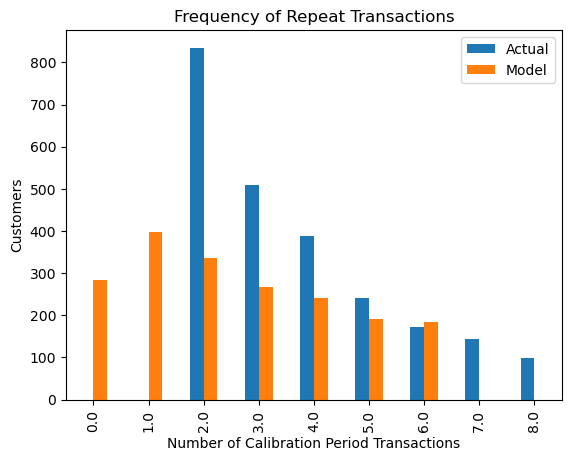

In [79]:
#TAHMİN SONUÇLARININ DEĞERLENDİRİLMESİ
plot_period_transactions(bgf)
plt.show(block=True)

<span style="color: blue; font-weight: bold;">3.GAMMA GAMMA MODELİNİN KURULMASI</span>

In [81]:
ggf = GammaGammaFitter(penalizer_coef = 0.01)

In [83]:
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 2845 subjects, p: 3.79, q: 0.34, v: 3.73>

In [85]:
ggf.conditional_expected_average_profit(cltv_df['frequency'], cltv_df['monetary']).sort_values(ascending=False).head(10)

Customer ID
12415.0000   5772.1782
12590.0000   5029.4196
12435.0000   4288.9440
12409.0000   3918.8128
14088.0000   3917.1297
18102.0000   3870.9969
12753.0000   3678.5783
14646.0000   3654.8148
15749.0000   3216.0523
14096.0000   3196.4361
dtype: float64

In [87]:
cltv_df['expected_average_profit'] = ggf.conditional_expected_average_profit(cltv_df['frequency'], cltv_df['monetary'])

In [91]:
cltv_df.sort_values('expected_average_profit', ascending = False).head()

,recency,T,frequency,monetary,expected_purch_1_week,expected_purch_1_month,expected_average_profit
Customer ID,,,,,,,
12415.0000,44.7143,48.2857,21,5724.3026,0.3907,1.5603,5772.1782
12590.0000,0.0000,30.2857,2,4591.1725,0.0125,0.0497,5029.4196
12435.0000,26.8571,38.2857,2,3914.9450,0.0737,0.2939,4288.9440
12409.0000,14.7143,26.1429,3,3690.8900,0.1202,0.4793,3918.8128
14088.0000,44.5714,46.1429,13,3864.5546,0.2647,1.0568,3917.1297


<span style="color: blue; font-weight: bold;">4.BG-NBD VE GG MODELİ İLE CLTV'NİN HESAPLANMASI</span>

In [95]:
cltv = ggf.customer_lifetime_value(bgf,
                                  cltv_df['frequency'],
                                  cltv_df['recency'],
                                  cltv_df['T'],
                                  cltv_df['monetary'],
                                  time = 3, #aylık
                                  freq='W',#haftalık
                                  discount_rate=0.01)

In [97]:
cltv.head()

Customer ID
12347.0000   1128.6323
12348.0000    536.9851
12352.0000    528.1884
12356.0000   1053.5665
12358.0000    947.1019
Name: clv, dtype: float64

In [99]:
cltv = cltv.reset_index()

In [101]:
cltv.head()

,Customer ID,clv
0,12347.0000,1128.6323
1,12348.0000,536.9851
2,12352.0000,528.1884
3,12356.0000,1053.5665
4,12358.0000,947.1019


In [103]:
cltv_final = cltv_df.merge(cltv, on='Customer ID', how = 'left')

In [105]:
cltv_final.sort_values(by='clv', ascending = False).head(20)

,Customer ID,recency,T,frequency,monetary,expected_purch_1_week,expected_purch_1_month,expected_average_profit,clv
1122,14646.0000,50.4286,50.7143,73,3646.0757,1.2439,4.9685,3654.8148,57772.0482
2761,18102.0000,52.2857,52.5714,60,3859.7391,0.9967,3.9812,3870.9969,49035.0124
843,14096.0000,13.8571,14.5714,17,3163.5882,0.7809,3.1119,3196.4361,31471.2472
36,12415.0000,44.7143,48.2857,21,5724.3026,0.3907,1.5603,5772.1782,28644.1480
1257,14911.0000,53.1429,53.4286,201,691.7101,3.2285,12.8962,692.3264,28411.5289
2458,17450.0000,51.2857,52.5714,46,2863.2749,0.7692,3.0723,2874.1987,28095.8369
874,14156.0000,51.5714,53.1429,55,2104.0267,0.9047,3.6138,2110.7542,24270.9807
2487,17511.0000,52.8571,53.4286,31,2933.9431,0.5210,2.0810,2950.5801,19536.2640
1754,16000.0000,0.0000,0.4286,3,2335.1200,0.4784,1.8938,2479.8048,14675.7446
2075,16684.0000,50.4286,51.2857,28,2209.9691,0.4897,1.9560,2223.8850,13838.3054


NOT:BG-NBD modeli derki düzenli olan bir müşteri kullanıcı özelindeki recency değeri arttıkça müşterinin satın alma olasılığı yaklaşıyordur.Çünkü müşteri alışveriş yaptı ve kısmi churn oldu ve belirli bir zaman gectikten sonra tekrardan satın alma ihtiyacı ortaya çıkar. T ile recency arasında bir yakınlık varsa (diğer değişkenlere de bakılmalı) 

<span style="color: blue; font-weight: bold;">5.CLTV'YE GÖRE SEGMENTLERİN OLUŞTURULMASI</span>

In [110]:
cltv_final['segment']=pd.qcut(cltv_final['clv'],4, labels=['D','C','B','A'])

In [112]:
cltv_final

,Customer ID,recency,T,frequency,monetary,expected_purch_1_week,expected_purch_1_month,expected_average_profit,clv,segment
0,12347.0000,52.1429,52.5714,7,615.7143,0.1407,0.5617,631.9123,1128.6323,A
1,12348.0000,40.2857,51.2857,4,442.6950,0.0912,0.3643,463.7460,536.9851,B
2,12352.0000,37.1429,42.4286,8,219.5425,0.1851,0.7391,224.8868,528.1884,B
3,12356.0000,43.1429,46.5714,3,937.1433,0.0834,0.3330,995.9989,1053.5665,A
4,12358.0000,21.2857,21.5714,2,575.2100,0.1190,0.4740,631.9022,947.1019,A
...,...,...,...,...,...,...,...,...,...,...
2840,18272.0000,34.8571,35.2857,6,513.0967,0.1726,0.6890,529.0185,1157.0498,A
2841,18273.0000,36.4286,36.8571,3,68.0000,0.1016,0.4052,73.4942,94.4849,D
2842,18282.0000,16.8571,18.1429,2,89.0250,0.1332,0.5306,99.5249,166.7895,D
2843,18283.0000,47.5714,48.2857,16,130.9300,0.3072,1.2269,132.6012,517.3801,B


In [114]:
cltv_final.groupby('segment').agg({'count','mean','sum'})#analiz için bunu yapıyoruz.

Customer ID                     recency                        T               frequency                  monetary                expected_purch_1_week              expected_purch_1_month              expected_average_profit                         clv                
                  sum       mean count        sum    mean count        sum    mean count       sum    mean count         sum     mean count                   sum   mean count                    sum   mean count                     sum     mean count          sum      mean count
segment                                                                                                                                                                                                                                                                               
D       11065116.0000 15540.8933   712 16057.4286 22.5526   712 28937.5714 40.6427   712      2155  3.0267   712 130217.3395 182.8895   712               51.5215 0.0724   712               205.4887 0.2886   712             141309.4070 198.4683   712  105370.6512  147.9925   712
C       10893465.0000 15321.3291   711 21619.0000 30.4065   711 26992.1429 37.9636   711      2879  4.0492   711 194279.6633 273.2485   711               85.3541 0.1200   711               340.4235 0.4788   711             207364.9690 291.6526   711  273274.1543  384.3518   711
B       10907691.0000 15341.3376   711 20987.8571 29.5188   711 24891.1429 35.0086   711      3928  5.5246   711 267794.9936 376.6456   711              117.7696 0.1656   711               469.5335 0.6604   711             282409.0553 397.1998   711  499358.0401  702.3320   711
A       10639939.0000 14964.7525   711 22176.5714 31.1907   711 24356.4286 34.2566   711      8077 11.3601   711 466541.7897 656.1769   711              201.2348 0.2830   711               802.5339 1.1287   711             484829.6468 681.8982   711 1635111.0941 2299.7343   711

<span style="color: blue; font-weight: bold;">6.ÇALIŞMANIN FONKSİYONLAŞTIRILMASI</span>

In [ ]:
def create_cltv_p(dataframe, month=3):
    # 1. Veri Ön İşleme
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    today_date = dt.datetime(2011, 12, 11)

    cltv_df = dataframe.groupby('Customer ID').agg(
        {'InvoiceDate': [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days,
                         lambda InvoiceDate: (today_date - InvoiceDate.min()).days],
         'Invoice': lambda Invoice: Invoice.nunique(),
         'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

    cltv_df.columns = cltv_df.columns.droplevel(0)
    cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
    cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]
    cltv_df = cltv_df[(cltv_df['frequency'] > 1)]
    cltv_df["recency"] = cltv_df["recency"] / 7
    cltv_df["T"] = cltv_df["T"] / 7

    # 2. BG-NBD Modelinin Kurulması
    bgf = BetaGeoFitter(penalizer_coef=0.001)
    bgf.fit(cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T'])

    cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                                  cltv_df['frequency'],
                                                  cltv_df['recency'],
                                                  cltv_df['T'])

    cltv_df["expected_purc_1_month"] = bgf.predict(4,
                                                   cltv_df['frequency'],
                                                   cltv_df['recency'],
                                                   cltv_df['T'])

    cltv_df["expected_purc_3_month"] = bgf.predict(12,
                                                   cltv_df['frequency'],
                                                   cltv_df['recency'],
                                                   cltv_df['T'])

    # 3. GAMMA-GAMMA Modelinin Kurulması
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(cltv_df['frequency'], cltv_df['monetary'])
    cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                                 cltv_df['monetary'])

    # 4. BG-NBD ve GG modeli ile CLTV'nin hesaplanması.
    cltv = ggf.customer_lifetime_value(bgf,
                                       cltv_df['frequency'],
                                       cltv_df['recency'],
                                       cltv_df['T'],
                                       cltv_df['monetary'],
                                       time=month,  # 3 aylık
                                       freq="W",  # T'nin frekans bilgisi.
                                       discount_rate=0.01)

    cltv = cltv.reset_index()
    cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
    cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

    return cltv_final


df = df_.copy()

cltv_final2 = create_cltv_p(df)

cltv_final2.to_csv("cltv_prediction.csv")